# Analysing Elexon Datasets

## 2025 Generation by Source data

       Dataset               PublishTime             StartTime SettlementDate  \
6700    FUELHH 2025-01-01 00:00:00+00:00  2024-12-31T23:30:00Z     2024-12-31   
6680    FUELHH 2025-01-01 00:30:00+00:00  2025-01-01T00:00:00Z     2025-01-01   
6660    FUELHH 2025-01-01 01:00:00+00:00  2025-01-01T00:30:00Z     2025-01-01   
6640    FUELHH 2025-01-01 01:30:00+00:00  2025-01-01T01:00:00Z     2025-01-01   
6620    FUELHH 2025-01-01 02:00:00+00:00  2025-01-01T01:30:00Z     2025-01-01   
...        ...                       ...                   ...            ...   
349520  FUELHH 2025-12-31 21:30:00+00:00  2025-12-31T21:00:00Z     2025-12-31   
349500  FUELHH 2025-12-31 22:00:00+00:00  2025-12-31T21:30:00Z     2025-12-31   
349480  FUELHH 2025-12-31 22:30:00+00:00  2025-12-31T22:00:00Z     2025-12-31   
349460  FUELHH 2025-12-31 23:00:00+00:00  2025-12-31T22:30:00Z     2025-12-31   
349440  FUELHH 2025-12-31 23:30:00+00:00  2025-12-31T23:00:00Z     2025-12-31   

        SettlementPeriod Fu

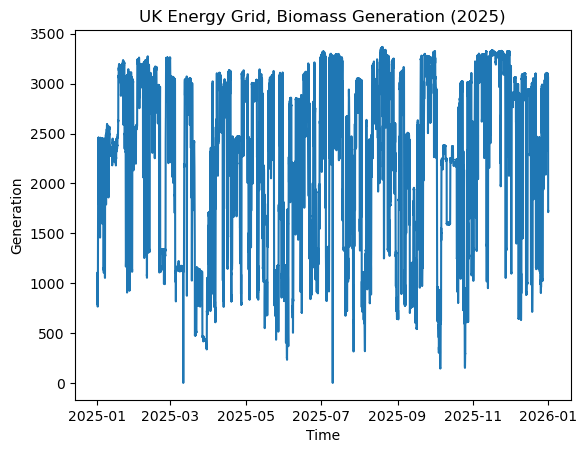

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sorting the dataset by correct chronological order
df = pd.read_csv("Gen2025.csv")
df["PublishTime"] = pd.to_datetime(df["PublishTime"])
df = df.sort_values("PublishTime")

#isolates just the biomass fueltype generations
biomass_df = df[df["FuelType"]=="BIOMASS"]
print(biomass_df)

#test plotting this graph 
plt.plot(biomass_df["PublishTime"], biomass_df["Generation"])
plt.xlabel('Time')
plt.ylabel('Generation')
plt.title('UK Energy Grid, Biomass Generation (2025)')
plt.show()




